# Week:2 Know your data

### Objective:
The objective of the assignment is to perform statistical analysis on a given data using python libraries and exploratory data analysis using data visualization techniques.

We have to use Fatal Police Shooting Data to answer the questions given in this notebook.

### Fatal Police Shooting Data

**About dataset**\
The dataset consists of following columns
1. **id**                         : unqiue identifier of each victim
2. **name**                       : name of a victim
3. **date**                       : date on fatal shooting 
4. **manner_of_death**            : manner of death classification
    * Shot
    * Shot and Tasered
5. **armed**                      : indicates that the victim was armed with some sort of implement that a police officer believed could inflict harm
    * undetermined: it is not known whether or not the victim had a weapon
    * unknown: the victim was armed, but it is not known what the object was
    * unarmed: the victim was not armed
6. **age**                        : age of victim
7. **gender**                     : the gender of the victim. The Post identifies victims by the gender they identify with if reports indicate that it differs from their biological sex.
    * M: Male
    * F: Female
    * None: Unknown
8. **race**                       : race of victim
    * W: White, non-Hispanic
    * B: Black, non-Hispanic
    * A: Asian
    * N: Native American
    * H: Hispanic
    * O: Other
    * None: unknown
9. **city**                       : the municipality where the fatal shooting took place. Note that in some cases this field may contain a county name if a more specific municipality is unavailable or unknown.
10. **state**                     : two-letter postal code abbreviation
11. **signs_of_mental_illness**   : News reports have indicated the victim had a history of mental health issues, expressed suicidal intentions or was experiencing mental distress at the time of the shooting.
12. **threat_level**              : These would include incidents where officers or others were shot at, threatened with a gun, attacked with other weapons or physical force, etc. The attack category is meant to flag the highest level of threat. The other and undetermined categories represent all remaining cases. Other includes many incidents where officers or others faced significant threats. 
13. **flee**                      : News reports have indicated the victim was moving away from officers
    * Foot
    * Car
    * Not fleeing
14. **body_camera**               : News reports have indicated an officer was wearing a body camera and it may have recorded some portion of the incident.

## Let's Begin

In [1]:
# Install the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the dataframe 
df = pd.read_csv('week_1_assignment_output.csv')
df.head()

# TODO: Code to fill: 
# 1. '<<__A__>>' --> Path of the csv file

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_categories
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Senior citizens
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Adult
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Youth
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Youth
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Adult


In [3]:
# Check the shape of the dataset
df.shape

(4478, 15)

### Question: 1 (2 Marks)

Display the count of missing values in each column of a dataset

In [4]:
df.isnull().sum()

# TODO: Code to fill: 
# 1. '<<__A__>>' --> Use correct method from pandas library to check for number of missing values


id                           0
name                         0
date                         0
manner_of_death              0
armed                      248
age                        169
gender                       5
race                       373
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       179
body_camera                  0
age_categories               0
dtype: int64

### Question: 2 (2 Marks)
Display the outliers present in the age column using IQR method

In [5]:
# Quantile 1 of age column (25 percentage)
Q1 = df['age'].quantile(0.25)
# Quantile 3 of age column (75 percentage)
Q3 =  df['age'].quantile(0.75)

In [6]:
# Inter Quartile Range
IQR = Q3 - Q1
IQR

18.0

In [7]:
# Outliers present in upper case
upper_case = Q3 + (1.5*IQR)
print(upper_case)
# Outliers present in lower case
lower_case = Q1 - (1.5*IQR)
print(lower_case)

72.0
0.0


In [8]:
# Loop through the each data record in the age column and append a data to the outliers list variable 
outliers = []
for i in df['age']: 
  if (i < lower_case) or (i > upper_case):  # if any data point in the age column less than lower case or any data point greater than upper case will be an outlier
    outliers.append(i)

# TODO: Code to fill: 

# 1. '<<__A__>>' --> column name
# 2. '<<__B__>>' --> Apply the condition

In [9]:
# print outliers
print(outliers)


[75.0, 74.0, 77.0, 83.0, 76.0, 86.0, 76.0, 77.0, 76.0, 76.0, 80.0, 82.0, 86.0, 76.0, 83.0, 73.0, 91.0, 73.0, 79.0, 74.0, 75.0, 82.0, 76.0, 78.0, 84.0, 84.0, 81.0, 89.0, 73.0, 77.0, 76.0, 84.0, 81.0, 80.0, 77.0, 76.0, 74.0, 76.0, 73.0]


### Question: 3 (2 Marks) 
Group the year, gender, age categories to check how many victims were harmed

In [10]:
# Create a new column by extracting year from the date column
df['year'] = pd.to_datetime(df['date']).dt.year

In [11]:
df.groupby([ 'year','gender','age_categories'])[['id']].count()

 #Replace '<>' with correct method 

# TODO: Code to fill: 

# 1. '<<__A__>>' --> write your code here by selecting appropriate method/function from python 
# 2. '<<__B__>>' --> write column names from dataframe
# 3. '<<__C__>>' --> write your command 

id
year gender age_categories      
2015 F      Adult             18
            Senior citizens    6
            Teenage            5
            Youth             13
     M      Adult            309
            Child              1
            Senior citizens  166
            Teenage           89
            Youth            387
2016 F      Adult             15
            Child              1
            Senior citizens    7
            Youth             17
     M      Adult            304
            Senior citizens  170
            Teenage           84
            Youth            364
2017 F      Adult             12
            Senior citizens    8
            Teenage            5
            Youth             20
     M      Adult            297
            Child              1
            Senior citizens  179
            Teenage           79
            Youth            383
2018 F      Adult             19
            Senior citizens   11
            Teenage            3
            Youth             19
     M      Adult            314
            Senior citizens  207
            Teenage           85
            Youth            333
2019 F      Adult              8
            Senior citizens    6
            Teenage            4
            Youth             11
     M      Adult            169
            Senior citizens  107
            Teenage           49
            Youth            188

### Question: 4 (2 Marks )
Generate a bar plot using seaborn and understand the threat levels of different age categories

C:\Users\risha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\risha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\risha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\risha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='age_categories', ylabel='count'>

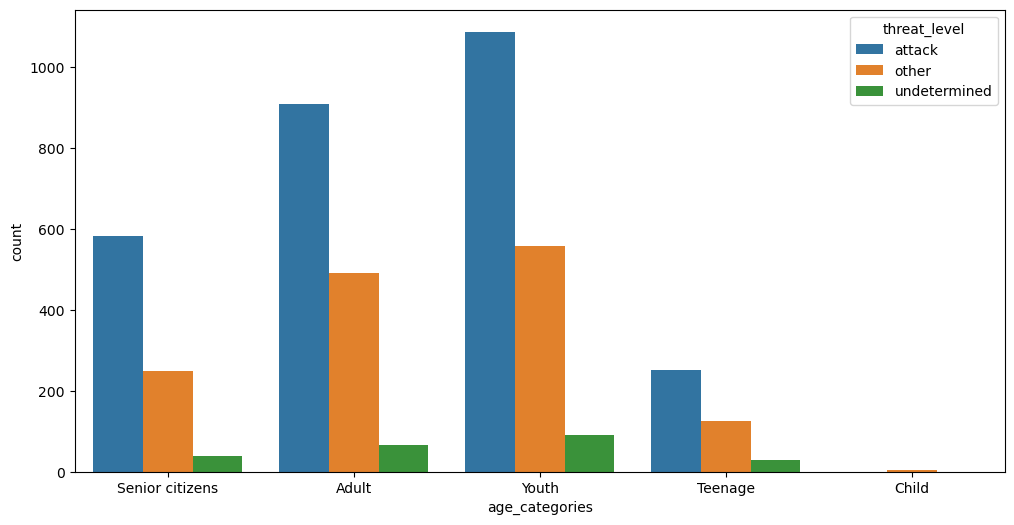

In [18]:
plt.figure(figsize=(12, 6))    # set a plot size (12,6)
sns.countplot(data=df, x="age_categories", hue="threat_level")


# TODO: Code to fill: 
#Replace '<>' with correct method 

# 1. '<<__A__>>' --> write your code to set plot size
# 2. '<<__B__>>' --> write your code here by selecting appropriate method from seaborn
# 3. '<<__C__>>' --> write your parameter here to load data  
# 4. '<<__D__>>' --> write your hue column

### Question: 5 (2 Marks )
Generate a bar plot using seaborn and understand the year wise kills based on victim race

C:\Users\risha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\risha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\risha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\risha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='year', ylabel='count'>

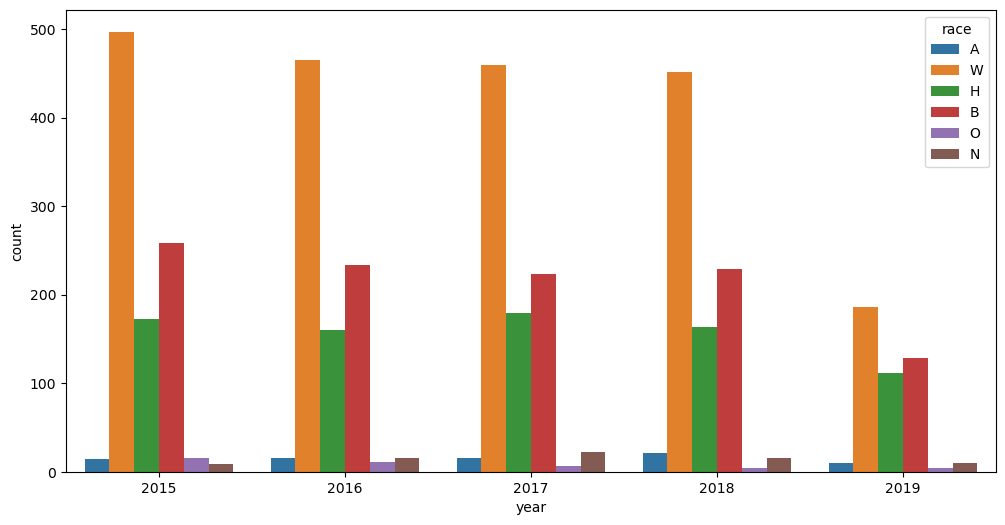

In [24]:
plt.figure(figsize=(12,6))    # set a plot size (12,6)
sns.countplot(data=df,x="year",hue="race") 

# TODO: Code to fill: 
#Replace '<>' with correct method 

# 1. '<<__A__>>' --> write your code to set plot size
# 2. '<<__B__>>' --> write your code here by selecting appropriate method from seaborn
# 3. '<<__C__>>' --> write your parameter here to load data  
# 4. '<<__D__>>' --> write your hue column


In [25]:
# Save the data into csv to use for week-3 assignment
df.to_csv("week_2_assignment_output.csv",index=False)


## Thank you!